# Nobel Laureates
A EDA project

Key questions:
- Which country has more Laureates.
- Which category or field are the Laureates per country.

For the project I used the following libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

The data came into 6 separate csv fiels

In [4]:
chemistry_raw = pd.read_csv("Nobel Laureates For Chemistry - 1901 To 2022.csv", index_col=0)
economics_raw = pd.read_csv("Nobel Laureates For Economics - 1969 To 2022.csv", index_col=0)
literature_raw = pd.read_csv("Nobel Laureates For Literature - 1901 To 2022.csv", index_col=0)
medicine_raw = pd.read_csv("Nobel Laureates For Medicine - 1901 To 2022.csv", index_col=0)
physics_raw = pd.read_csv("Nobel Laureates For Physics - 1901 To 2022.csv", index_col=0)
peace_raw = pd.read_csv("Nobel Peace Prize Laureates - 1901 To 2022.csv", index_col=0)

Checking each file to make the columns consistent to concatenate the datasets.

- For all the documents I fix the Laureate fields by cleaning the field to leave just the name of the Laureate.

In [5]:
chemistry_raw['Field'] = "Chemistry"
chemistry = chemistry_raw.copy()
chemistry['Laureate'] = chemistry['Laureate'].str.split("(").str[0]
chemistry.head()

,Year,Laureate,Country,Rationale,Field
86,1970,Luis F. Leloir,Argentina,"""for his discovery of sugar nucleotides and th...",Chemistry
94,1975,John Warcup Cornforth,Australia,"""for his work on the stereochemistry of enzyme...",Chemistry
23,1923,Fritz Pregl,Austria,"""for his invention of the method of micro-anal...",Chemistry
97,1977,Ilya Prigogine,Belgium,"""for his contributions to non-equilibrium ther...",Chemistry
126,1993,Michael Smith,Canada,"""for contributions to the developments of meth...",Chemistry


In [6]:
medicine_raw['Field'] = "Medicine"
medicine_raw.head()

,Year,Laureate,Country,Rationale,Field
61,1947,Bernardo Alberto Houssay,Argentina,"""for his discovery of the part played by the h...",Medicine
147,1984,César Milstein,Argentina,"""for theories concerning the specificity in de...",Medicine
57,1945,Howard Walter Florey,Australia,"""for the discovery of penicillin and its curat...",Medicine
85,1960,Sir Frank Macfarlane Burnet,Australia,"""for discovery of acquired immunological toler...",Medicine
91,1963,Sir John Carew Eccles,Australia,"""for their discoveries concerning the ionic me...",Medicine


In [7]:
physics_raw['Field'] = "Physics"
physics = physics_raw.copy()
physics['Laureate'] = physics['Laureate'].str.split("(").str[0]
physics.head()

,Year,Laureate,Country,Rationale,Field
19,1915,William Lawrence Bragg,Australia,"""'For their services in the analysis of crysta...",Physics
196,2011,Brian P. Schmidt,Australia,"""for the discovery of the accelerating expansi...",Physics
39,1933,Erwin Schrödinger,Austria,"""for the discovery of new productive forms of ...",Physics
43,1936,Victor Francis Hess,Austria,"""for his discovery of cosmic radiation""",Physics
54,1945,Wolfgang Pauli,Austria,"""for the discovery of the Exclusion Principle,...",Physics


In [8]:
peace_raw['Field'] = "Peace"
peace = peace_raw.copy()
peace['Laureate'] = peace['Laureate'].str.split("(").str[0]
peace.head()

,Year,Laureate,Country,Rationale,Field
46,1936,Carlos Saavedra Lamas,Argentina,"""for his role as father of the Argentine Antiw...",Peace
96,1980,Adolfo Pérez Esquivel,Argentina,"""for being a source of inspiration to represse...",Peace
6,1905,Bertha von Suttner,Austria,"""for her audacity to oppose the horrors of war...",Peace
16,1911,Alfred Fried,Austria,"""for his effort to expose and fight what he co...",Peace
132,2006,Muhammad Yunus,Bangladesh,"""for their efforts to create economic and soci...",Peace


In [9]:
economics_raw['Field'] = "Economics"
economics = economics_raw.drop(['PhD (or equivalent) alma mater', 'Institution (most significant tenure/at time of receipt)','Key contributions (non-exhaustive)'], axis=1)
economics['Laureate'] = economics['Laureate'].str.split("(").str[0]
economics.head()

,Year,Laureate,Country,Rationale,Field
8,1974,Friedrich Hayek,Austria,"""for their pioneering work in the theory of mo...",Economics
43,1999,Robert Mundell,Canada,"""for his analysis of monetary and fiscal polic...",Economics
39,1996,William Vickrey,Canada,"""for their fundamental contributions to the ec...",Economics
41,1997,Myron Scholes,Canada,"""for a new method to determine the value of de...",Economics
66,2010,Christopher A. Pissarides,Cyprus,"""for their analysis of markets with search fri...",Economics


In [10]:
literature_raw['Field'] = "Literature"
literature = literature_raw.drop(['Language(s)','Age Awarded','Genre(s)'], axis=1)
literature = literature.rename(columns={"Citation": "Rationale"})
literature['Laureate'] = literature['Laureate'].str.split("(").str[0]
literature.head()

,Year,Laureate,Country,Rationale,Field
75,1973,Patrick White,Australia,"""for an epic and psychological narrative art, ...",Literature
107,2004,Elfriede Jelinek,Austria,"""for her musical flow of voices and counter-vo...",Literature
122,2019,Peter Handke,Austria,"""for an influential work that with linguistic ...",Literature
118,2015,Svetlana Alexievich,Belarus,"""for her polyphonic writings, a monument to su...",Literature
11,1911,Maurice Maeterlinck,Belgium,"""in appreciation of his many-sided literary ac...",Literature


In [11]:
print("Chemistry:",chemistry.shape) 
print("Economics:",economics.shape) 
print("Literature:",literature.shape) 
print("Medicine:",medicine_raw.shape) 
print("Physics:",physics.shape) 
print("Peace:",peace.shape) 

Chemistry: (191, 5)
Economics: (92, 5)
Literature: (119, 5)
Medicine: (225, 5)
Physics: (222, 5)
Peace: (139, 5)


In [12]:
nobel_price = [chemistry,
               economics,
               literature, 
               medicine_raw, 
               physics, 
               peace]

In [13]:
nobel = pd.concat(nobel_price)
nobel.shape

(988, 5)

In [14]:
nobel.head()

,Year,Laureate,Country,Rationale,Field
86,1970,Luis F. Leloir,Argentina,"""for his discovery of sugar nucleotides and th...",Chemistry
94,1975,John Warcup Cornforth,Australia,"""for his work on the stereochemistry of enzyme...",Chemistry
23,1923,Fritz Pregl,Austria,"""for his invention of the method of micro-anal...",Chemistry
97,1977,Ilya Prigogine,Belgium,"""for his contributions to non-equilibrium ther...",Chemistry
126,1993,Michael Smith,Canada,"""for contributions to the developments of meth...",Chemistry


The number of Laureates per field, Medicine, Physics and Quemistry are the fields that have receive more prizes.

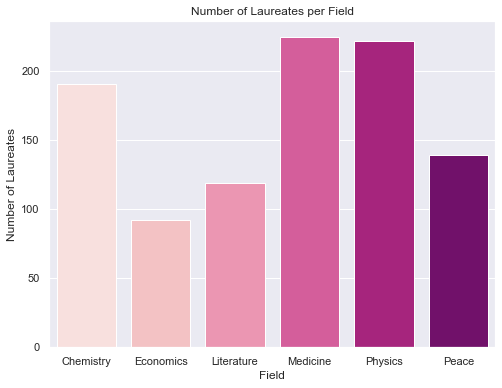

In [34]:
plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Field", data=nobel, palette="RdPu")
ax.set_ylabel("Number of Laureates")
ax.set_title("Number of Laureates per Field")
plt.show()

The 10 countries that receive more prizes are shown in the bar chart below with US ahead by more than three times than the second country.

In [35]:
nobel['Country'].value_counts()

United States     342
United Kingdom    113
Germany            87
France             63
Sweden             31
                 ... 
Stateless           1
Peru                1
Iceland             1
Cyprus              1
Yemen               1
Name: Country, Length: 73, dtype: int64

In [37]:
nobel.Country.value_counts() / len(nobel)

United States     0.346154
United Kingdom    0.114372
Germany           0.088057
France            0.063765
Sweden            0.031377
                    ...   
Stateless         0.001012
Peru              0.001012
Iceland           0.001012
Cyprus            0.001012
Yemen             0.001012
Name: Country, Length: 73, dtype: float64

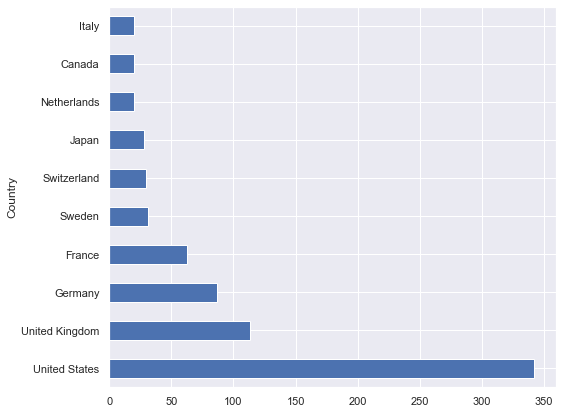

In [19]:
nobel['Country'].value_counts()[:10].plot(
    figsize=(8,7), 
    kind='barh',
    ylabel='Count of Laureates', 
    xlabel='Country')
plt.show()

In [20]:
us = nobel["Country"]=="United States"
nobel_us = nobel[us]

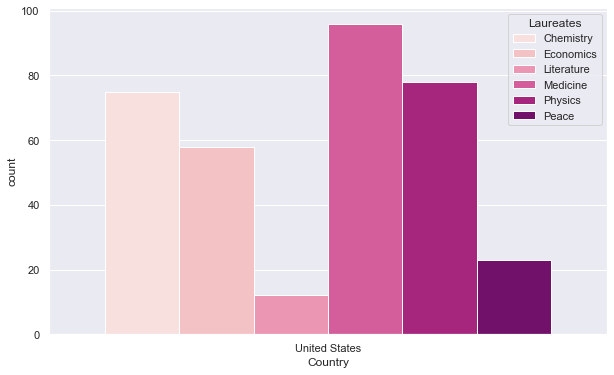

In [21]:
plt.subplots(figsize=(10, 6))
p = sns.countplot(data=nobel_us, x='Country', hue='Field', palette="RdPu")
p.legend(title='Laureates', loc='upper right')

In [22]:
uk = nobel["Country"]=="United Kingdom"
nobel_uk = nobel[uk]

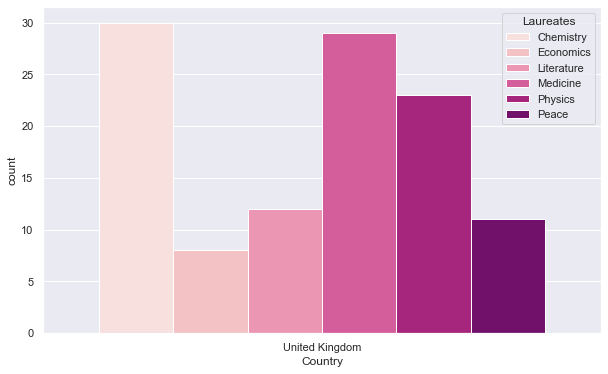

In [24]:
plt.subplots(figsize=(10, 6))
p = sns.countplot(data=nobel_uk, x='Country', hue='Field', palette="RdPu")
p.legend(title='Laureates', loc='upper right')

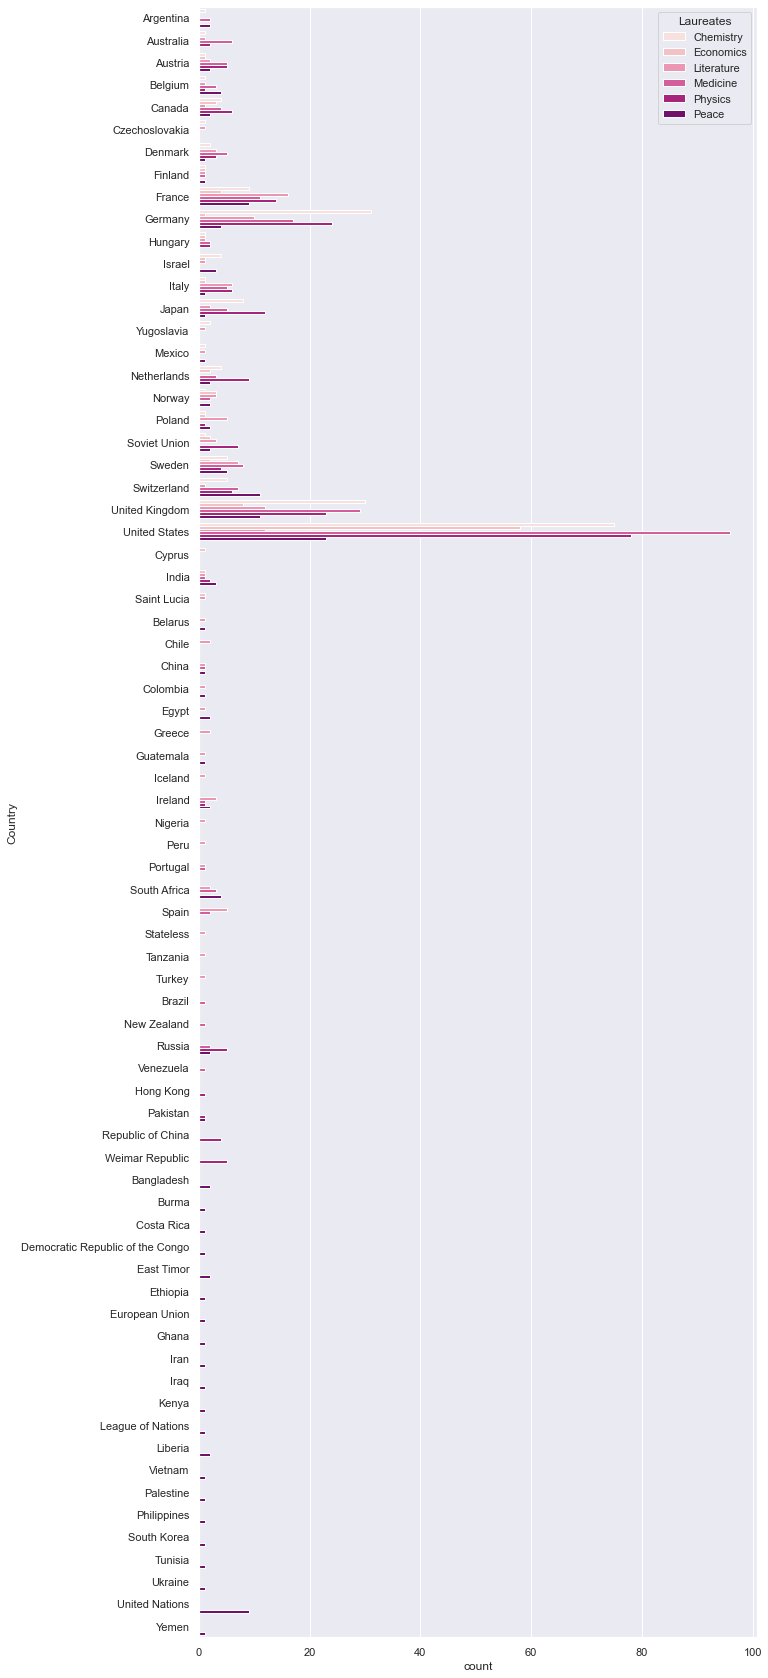

In [26]:
plt.subplots(figsize=(10, 30))
p = sns.countplot(data=nobel, y='Country', hue='Field', palette="RdPu")
p.legend(title='Laureates', loc='upper right')

In [27]:
nobel["Country"].value_counts()[:10]

United States     342
United Kingdom    113
Germany            87
France             63
Sweden             31
Switzerland        30
Japan              28
Netherlands        20
Canada             20
Italy              20
Name: Country, dtype: int64

In [28]:
top10 = ["United States", "United Kingdom", "Germany", 
         "France", "Sweden", "Switzerland", "Japan", 
         "Netherlands", "Canada", "Italy"]

nobel_top10 = nobel.loc[nobel["Country"].isin(top10)]

In [40]:
nobel_top10.groupby(["Field"])["Country"].value_counts(normalize=True)

Field       Country       
Chemistry   United States     0.436047
            Germany           0.180233
            United Kingdom    0.174419
            France            0.052326
            Japan             0.046512
            Sweden            0.029070
            Switzerland       0.029070
            Canada            0.023256
            Netherlands       0.023256
            Italy             0.005814
Economics   United States     0.734177
            United Kingdom    0.101266
            France            0.050633
            Canada            0.037975
            Netherlands       0.025316
            Sweden            0.025316
            Germany           0.012658
            Italy             0.012658
Literature  France            0.238806
            United Kingdom    0.179104
            United States     0.179104
            Germany           0.149254
            Sweden            0.104478
            Italy             0.089552
            Japan             0.02985

The graph below show the top 10 countries with more Laureates and the fields.

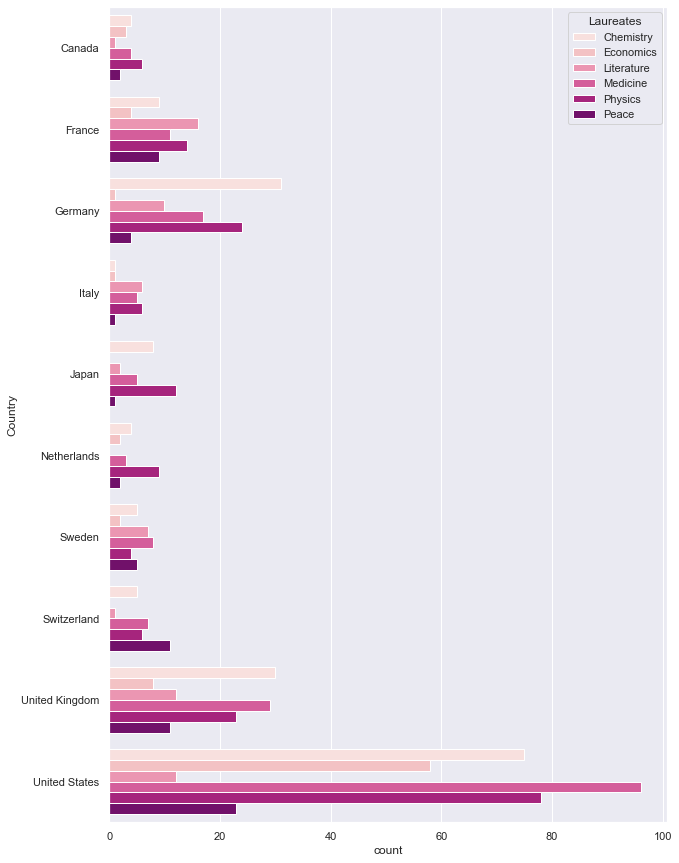

In [29]:
plt.subplots(figsize=(10, 15))
p = sns.countplot(data=nobel_top10, y='Country', hue='Field', palette="RdPu")
p.legend(title='Laureates', loc='upper right')

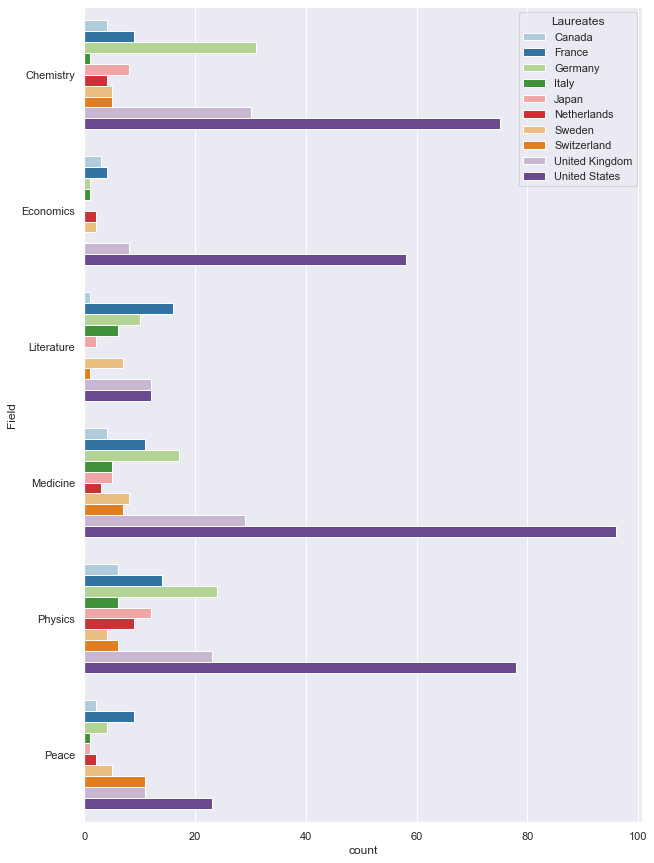

In [42]:
plt.subplots(figsize=(10, 15))
p = sns.countplot(data=nobel_top10, y='Field', hue='Country', palette="Paired")
p.legend(title='Laureates', loc='upper right')